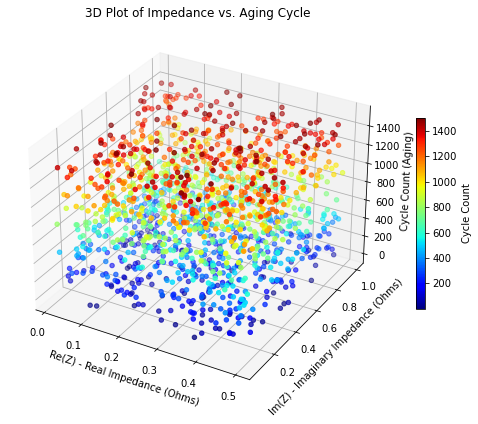

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

np.random.seed(42)
num_samples = 1500
Re_values = np.random.uniform(0.01, 0.5, num_samples)
Rct_values = np.random.uniform(0.05, 1.0, num_samples)
Cycle_count = np.arange(1, num_samples + 1)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(Re_values, Rct_values, Cycle_count, c=Cycle_count, cmap='jet', marker='o')
ax.set_xlabel('Re(Z) - Real Impedance (Ohms)')
ax.set_ylabel('Im(Z) - Imaginary Impedance (Ohms)')
ax.set_zlabel('Cycle Count (Aging)')
ax.set_title('3D Plot of Impedance vs. Aging Cycle')
plt.colorbar(sc, ax=ax, shrink=0.5, label='Cycle Count')
plt.show()


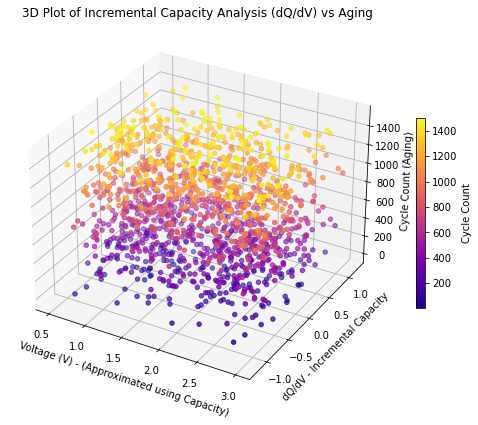

In [2]:
Capacity_values = np.random.uniform(0.5, 3.0, num_samples)
dQ_dV = np.gradient(Capacity_values)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(Capacity_values, dQ_dV, Cycle_count, c=Cycle_count, cmap='plasma', marker='o')
ax.set_xlabel('Voltage (V) - (Approximated using Capacity)')
ax.set_ylabel('dQ/dV - Incremental Capacity')
ax.set_zlabel('Cycle Count (Aging)')
ax.set_title('3D Plot of Incremental Capacity Analysis (dQ/dV) vs Aging')
plt.colorbar(sc, ax=ax, shrink=0.5, label='Cycle Count')
plt.show()


RMSE: 0.11756072493084743
R² Score: 0.9630839844824898


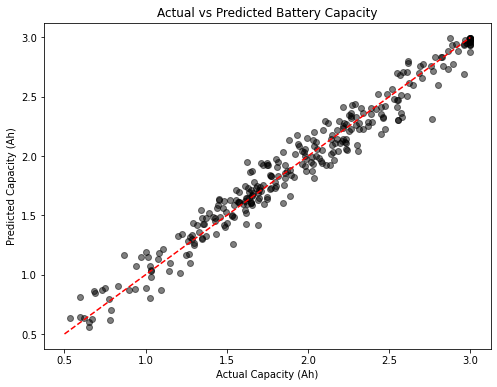

In [8]:
Capacity_values = 3.5 - (2.5 * Re_values) - (1.8 * Rct_values) + np.random.normal(0, 0.1, num_samples)
Capacity_values = np.clip(Capacity_values, 0.5, 3.0)
synthetic_data = pd.DataFrame({'Re': Re_values, 'Rct': Rct_values, 'Capacity': Capacity_values})
X = synthetic_data[['Re', 'Rct']]
y = synthetic_data['Capacity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a refined model
model = make_pipeline(PolynomialFeatures(degree=2), RandomForestRegressor(n_estimators=200, random_state=42))
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'RMSE: {rmse}')
print(f'R² Score: {r2}')

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='black')
plt.plot([0.5, 3.0], [0.5, 3.0], '--', color='red')
plt.xlabel('Actual Capacity (Ah)')
plt.ylabel('Predicted Capacity (Ah)')
plt.title('Actual vs Predicted Battery Capacity')
plt.show()
